# 1. Exploración Inicial y Preprocesamiento de Datos
## Predicción de Churn en Telecomunicaciones

**Objetivo**: Realizar un análisis exploratorio completo del dataset Telco Customer Churn, identificar patrones, tratar valores faltantes y preparar los datos para el modelado.

---

## 1.1 Importación de Librerías

In [1]:
# Librerías de manipulación y análisis de datos
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')

# Paleta de colores elegante: Vinotinto, Grises y Rojos
COLOR_PALETTE = {
    'primary': '#5D3A3A',        # Marrón oscuro (vinotinto oscuro)
    'secondary': '#8B4C4C',      # Vinotinto medio
    'tertiary': '#B85C5C',       # Rojo rosado
    'quaternary': '#D98B8B',     # Rosa suave
    'quinary': '#6B6B6B',        # Gris medio
    'success': '#7D8B8F',        # Gris azulado (para "No Churn")
    'warning': '#A85F5F',        # Rojo medio
    'danger': '#6B2C2C',         # Vinotinto muy oscuro (para "Churn")
    'churn_yes': '#6B2C2C',      # Vinotinto oscuro para churn
    'churn_no': '#7D8B8F',       # Gris azulado para no churn
    'palette_main': ['#5D3A3A', '#8B4C4C', '#B85C5C', '#D98B8B', '#6B6B6B', '#7D8B8F', '#A85F5F', '#4A4A4A']
}

sns.set_palette(COLOR_PALETTE['palette_main'])
%matplotlib inline

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)


## 1.2 Carga de Datos

In [2]:
# Cargar el dataset
df = pd.read_csv('../data/telco_churn.csv')

print(f"Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
print("Primeras filas del dataset:")
df.head()

Dimensiones del dataset: 7043 filas x 21 columnas
Primeras filas del dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1.3 Información General del Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Estadísticas descriptivas de variables numéricas
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
df.describe()

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [5]:
# Variables numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nVariables Numéricas ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"  - {col}")

# Variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')
    
print(f"\nVariables Categóricas ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  - {col}")


Variables Numéricas (3):
  - SeniorCitizen
  - tenure
  - MonthlyCharges

Variables Categóricas (17):
  - gender
  - Partner
  - Dependents
  - PhoneService
  - MultipleLines
  - InternetService
  - OnlineSecurity
  - OnlineBackup
  - DeviceProtection
  - TechSupport
  - StreamingTV
  - StreamingMovies
  - Contract
  - PaperlessBilling
  - PaymentMethod
  - TotalCharges
  - Churn


## 1.4 Análisis de Valores Faltantes

In [6]:
# Análisis de valores nulos
print("ANÁLISIS DE VALORES FALTANTES")
missing_data = pd.DataFrame({
    'Columna': df.columns,
    'Valores_Nulos': df.isnull().sum(),
    'Porcentaje': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Valores_Nulos'] > 0].sort_values('Valores_Nulos', ascending=False)

if len(missing_data) > 0:
    print("\nColumnas con valores faltantes:")
    print(missing_data.to_string(index=False))
else:
    print("\n No hay valores faltantes (NULL) en el dataset")

# Buscar espacios en blanco en columnas de texto
print("ANÁLISIS DE ESPACIOS EN BLANCO EN COLUMNAS DE TEXTO")

blank_counts = {}
for col in df.select_dtypes(include=['object']).columns:
    blank_count = (df[col] == ' ').sum()
    if blank_count > 0:
        blank_counts[col] = blank_count

if blank_counts:
    print("\nColumnas con espacios en blanco:")
    for col, count in blank_counts.items():
        print(f"  - {col}: {count} registros ({(count/len(df)*100):.2f}%)")
else:
    print("\n No hay espacios en blanco en columnas de texto")

ANÁLISIS DE VALORES FALTANTES

 No hay valores faltantes (NULL) en el dataset
ANÁLISIS DE ESPACIOS EN BLANCO EN COLUMNAS DE TEXTO

Columnas con espacios en blanco:
  - TotalCharges: 11 registros (0.16%)


### **Interpretación de Valores Faltantes**
Aunque no hay valores NULL explícitos, la columna `TotalCharges` contiene espacios en blanco que deben tratarse como valores faltantes.


## 1.5 Análisis de la Variable Objetivo: Churn

DISTRIBUCIÓN DE LA VARIABLE OBJETIVO: CHURN

        Cantidad  Porcentaje
Churn                      
No         5174       73.46
Yes        1869       26.54


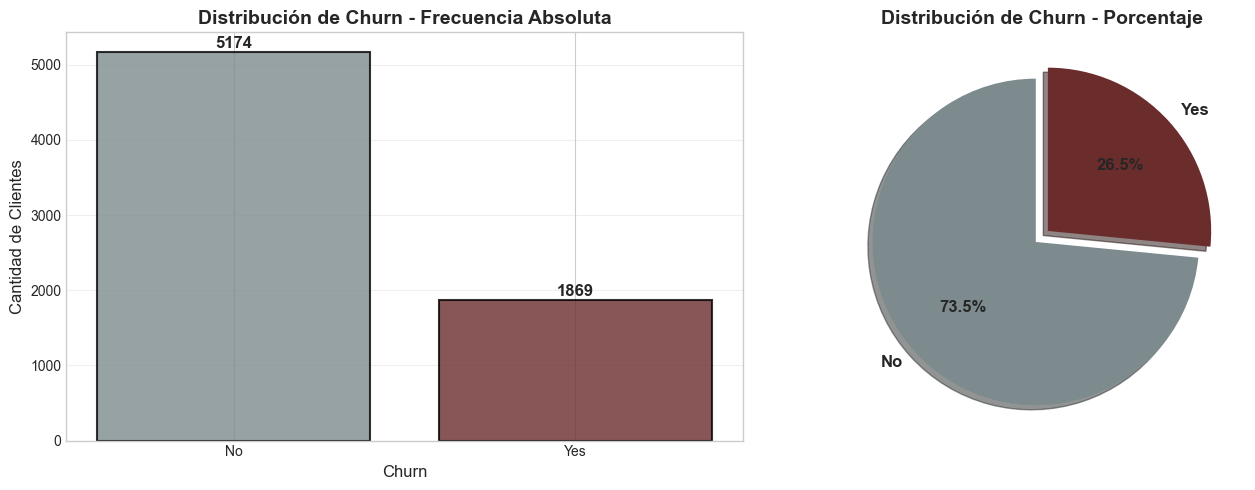

Tasa de Churn: 26.54%
Tasa de Retención: 73.46%


In [22]:
# Distribución de la variable objetivo
print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO: CHURN")
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

churn_df = pd.DataFrame({
    'Cantidad': churn_counts,
    'Porcentaje': churn_pct.round(2)
})
print("\n", churn_df)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
colors_churn = [COLOR_PALETTE['churn_no'], COLOR_PALETTE['churn_yes']]
axes[0].bar(churn_counts.index, churn_counts.values, color=colors_churn, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_title('Distribución de Churn - Frecuencia Absoluta', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn', fontsize=12)
axes[0].set_ylabel('Cantidad de Clientes', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontsize=12, fontweight='bold')

# Gráfico de pastel
explode = (0.05, 0.05)
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors_churn, explode=explode, shadow=True, 
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Distribución de Churn - Porcentaje', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Tasa de Churn: {churn_pct['Yes']:.2f}%")
print(f"Tasa de Retención: {churn_pct['No']:.2f}%")


### **Análisis e Interpretación de la Variable Objetivo**

**Hallazgos Clave:**
- El dataset presenta **desbalanceo de clases**, con aproximadamente 73% de clientes que permanecen (No Churn) y 27% que abandonan (Churn).
- El ratio de desbalanceo es aproximadamente 3:1, lo que es moderado y manejable.

**Implicaciones:**
- Debemos considerar técnicas de balanceo o ajuste de pesos en los modelos.
- Métricas como **Precision**, **Recall** y **F1-Score** serán más informativas que la Accuracy.

## 1.6 Análisis de Variables Numéricas

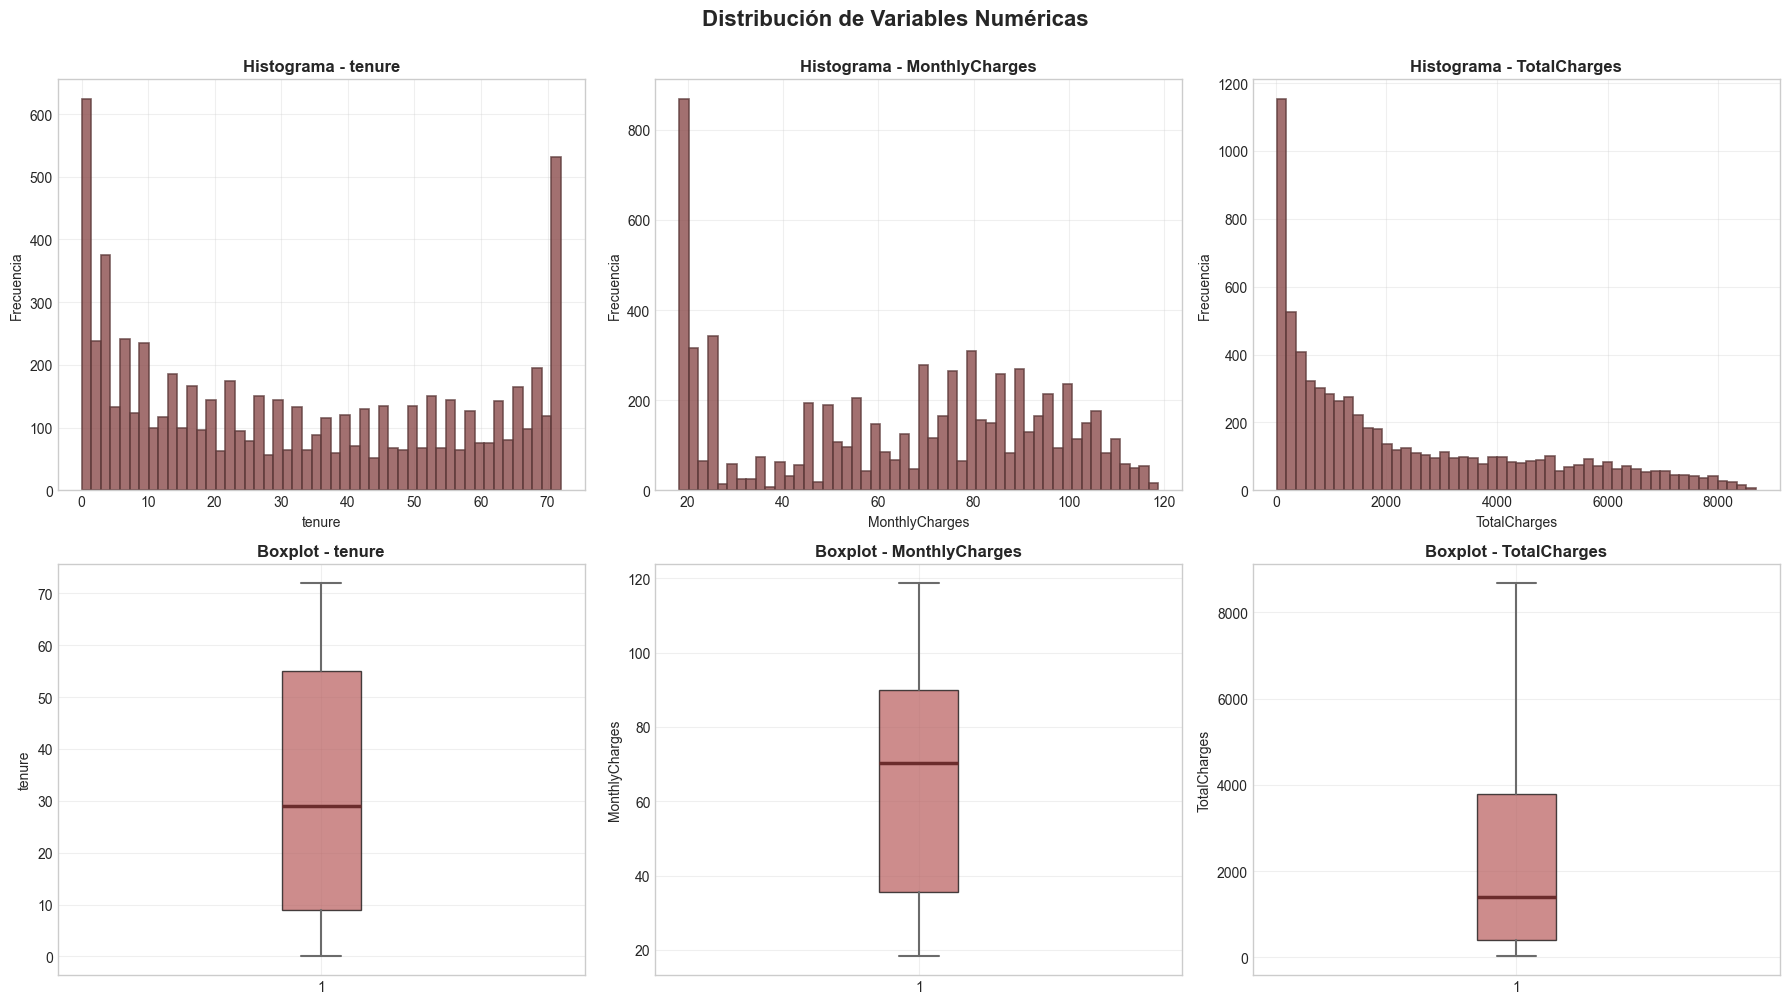


ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS
       tenure  MonthlyCharges
count 7043.00         7043.00
mean    32.37           64.76
std     24.56           30.09
min      0.00           18.25
25%      9.00           35.50
50%     29.00           70.35
75%     55.00           89.85
max     72.00          118.75


In [23]:
# Distribución de variables numéricas
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16, fontweight='bold', y=1.00)

for idx, col in enumerate(numeric_features):
    # Convertir TotalCharges a numérico si es necesario
    if col == 'TotalCharges' and df[col].dtype == 'object':
        df_temp = pd.to_numeric(df[col], errors='coerce')
    else:
        df_temp = df[col]
    
    # Histograma
    axes[0, idx].hist(df_temp.dropna(), bins=50, color=COLOR_PALETTE['secondary'], 
                      alpha=0.8, edgecolor=COLOR_PALETTE['primary'], linewidth=1.2)
    axes[0, idx].set_title(f'Histograma - {col}', fontsize=12, fontweight='bold')
    axes[0, idx].set_xlabel(col, fontsize=10)
    axes[0, idx].set_ylabel('Frecuencia', fontsize=10)
    axes[0, idx].grid(alpha=0.3)
    
    # Boxplot
    bp = axes[1, idx].boxplot(df_temp.dropna(), vert=True, patch_artist=True,
                         boxprops=dict(facecolor=COLOR_PALETTE['tertiary'], alpha=0.7),
                         medianprops=dict(color=COLOR_PALETTE['danger'], linewidth=2.5),
                         whiskerprops=dict(color=COLOR_PALETTE['quinary'], linewidth=1.5),
                         capprops=dict(color=COLOR_PALETTE['quinary'], linewidth=1.5),
                         flierprops=dict(marker='o', markerfacecolor=COLOR_PALETTE['warning'], 
                                        markersize=6, alpha=0.5))
    axes[1, idx].set_title(f'Boxplot - {col}', fontsize=12, fontweight='bold')
    axes[1, idx].set_ylabel(col, fontsize=10)
    axes[1, idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print("\nESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS")
print(df[numeric_features].describe())


### **Análisis e Interpretación de Variables Numéricas**

**Variable: tenure (Antigüedad del cliente en meses)**
- Distribución bimodal: muchos clientes nuevos (0-10 meses) y clientes leales (60-72 meses).
- Rango: 0 a 72 meses.
- Esta variable será clave para predecir churn, ya que es esperado que clientes nuevos suelan tener mayor probabilidad de abandono.

**Variable: MonthlyCharges (Cargo mensual)**
- Distribución relativamente uniforme con ligero sesgo.
- Rango: $18 a $118 aproximadamente.
- Clientes con cargos mensuales altos pueden tener mayor probabilidad de churn.

**Variable: TotalCharges (Cargos totales acumulados)**
- Fuertemente sesgada a la derecha (muchos clientes con bajos cargos totales).
- Relacionada con tenure: clientes con mayor antigüedad tienen mayores cargos totales.
- Presencia de outliers en valores altos.

## 1.7 Relación de Variables Numéricas con Churn

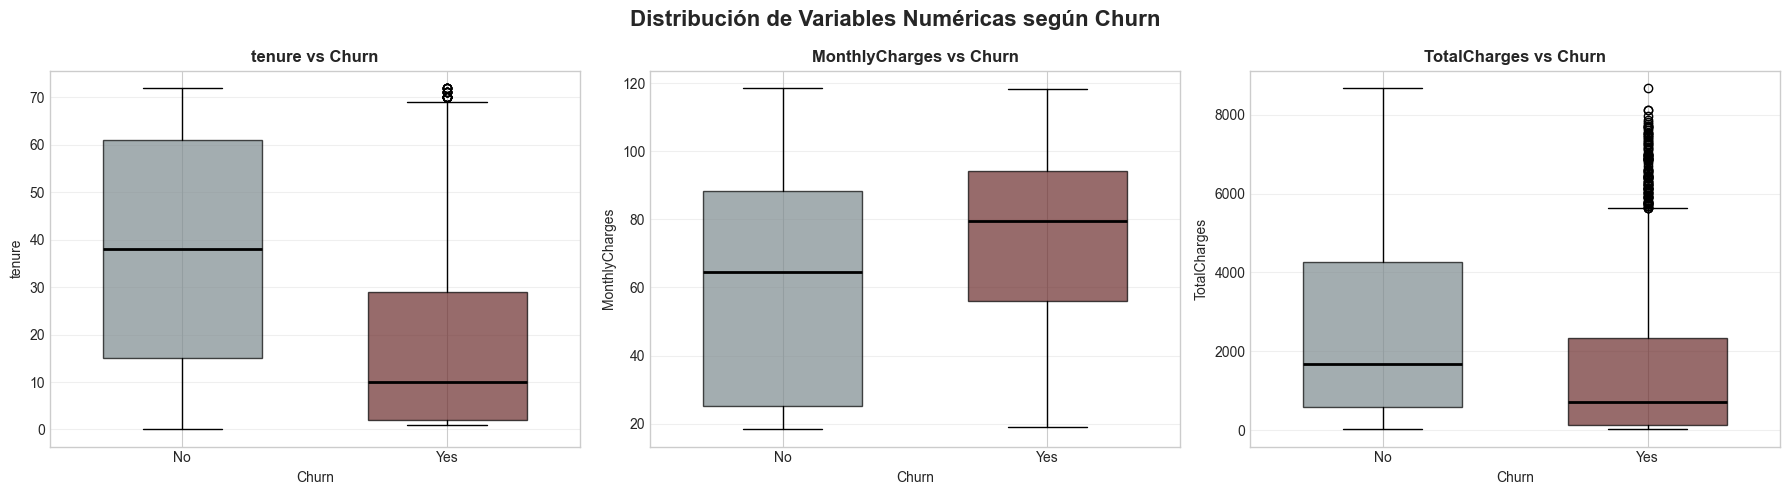


COMPARACIÓN DE MEDIAS POR GRUPO DE CHURN

tenure:
  No Churn (promedio): 37.57
  Sí Churn (promedio): 17.98
  Diferencia: 19.59

MonthlyCharges:
  No Churn (promedio): 61.27
  Sí Churn (promedio): 74.44
  Diferencia: 13.18

TotalCharges:
  No Churn (promedio): 2555.34
  Sí Churn (promedio): 1531.80
  Diferencia: 1023.55


In [24]:
# Comparación de distribuciones por Churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribución de Variables Numéricas según Churn', fontsize=16, fontweight='bold')

for idx, col in enumerate(numeric_features):
    # Convertir TotalCharges a numérico si es necesario
    if col == 'TotalCharges' and df[col].dtype == 'object':
        df_temp = df.copy()
        df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')
    else:
        df_temp = df
    
    churn_no = df_temp[df_temp['Churn'] == 'No'][col].dropna()
    churn_yes = df_temp[df_temp['Churn'] == 'Yes'][col].dropna()
    
    bp = axes[idx].boxplot([churn_no, churn_yes], 
                            labels=['No', 'Yes'],
                            patch_artist=True,
                            widths=0.6)
    
    # Aplicar colores
    colors = [COLOR_PALETTE['churn_no'], COLOR_PALETTE['churn_yes']]
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    for median in bp['medians']:
        median.set_color('black')
        median.set_linewidth(2)
    
    axes[idx].set_title(f'{col} vs Churn', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Churn', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Análisis estadístico por grupo
print("\nCOMPARACIÓN DE MEDIAS POR GRUPO DE CHURN")
for col in numeric_features:
    if col == 'TotalCharges' and df[col].dtype == 'object':
        df_temp = pd.to_numeric(df[col], errors='coerce')
    else:
        df_temp = df[col]
    
    print(f"\n{col}:")
    print(f"  No Churn (promedio): {df_temp[df['Churn'] == 'No'].mean():.2f}")
    print(f"  Sí Churn (promedio): {df_temp[df['Churn'] == 'Yes'].mean():.2f}")
    print(f"  Diferencia: {abs(df_temp[df['Churn'] == 'No'].mean() - df_temp[df['Churn'] == 'Yes'].mean()):.2f}")


## 1.8 Análisis de Variables Categóricas

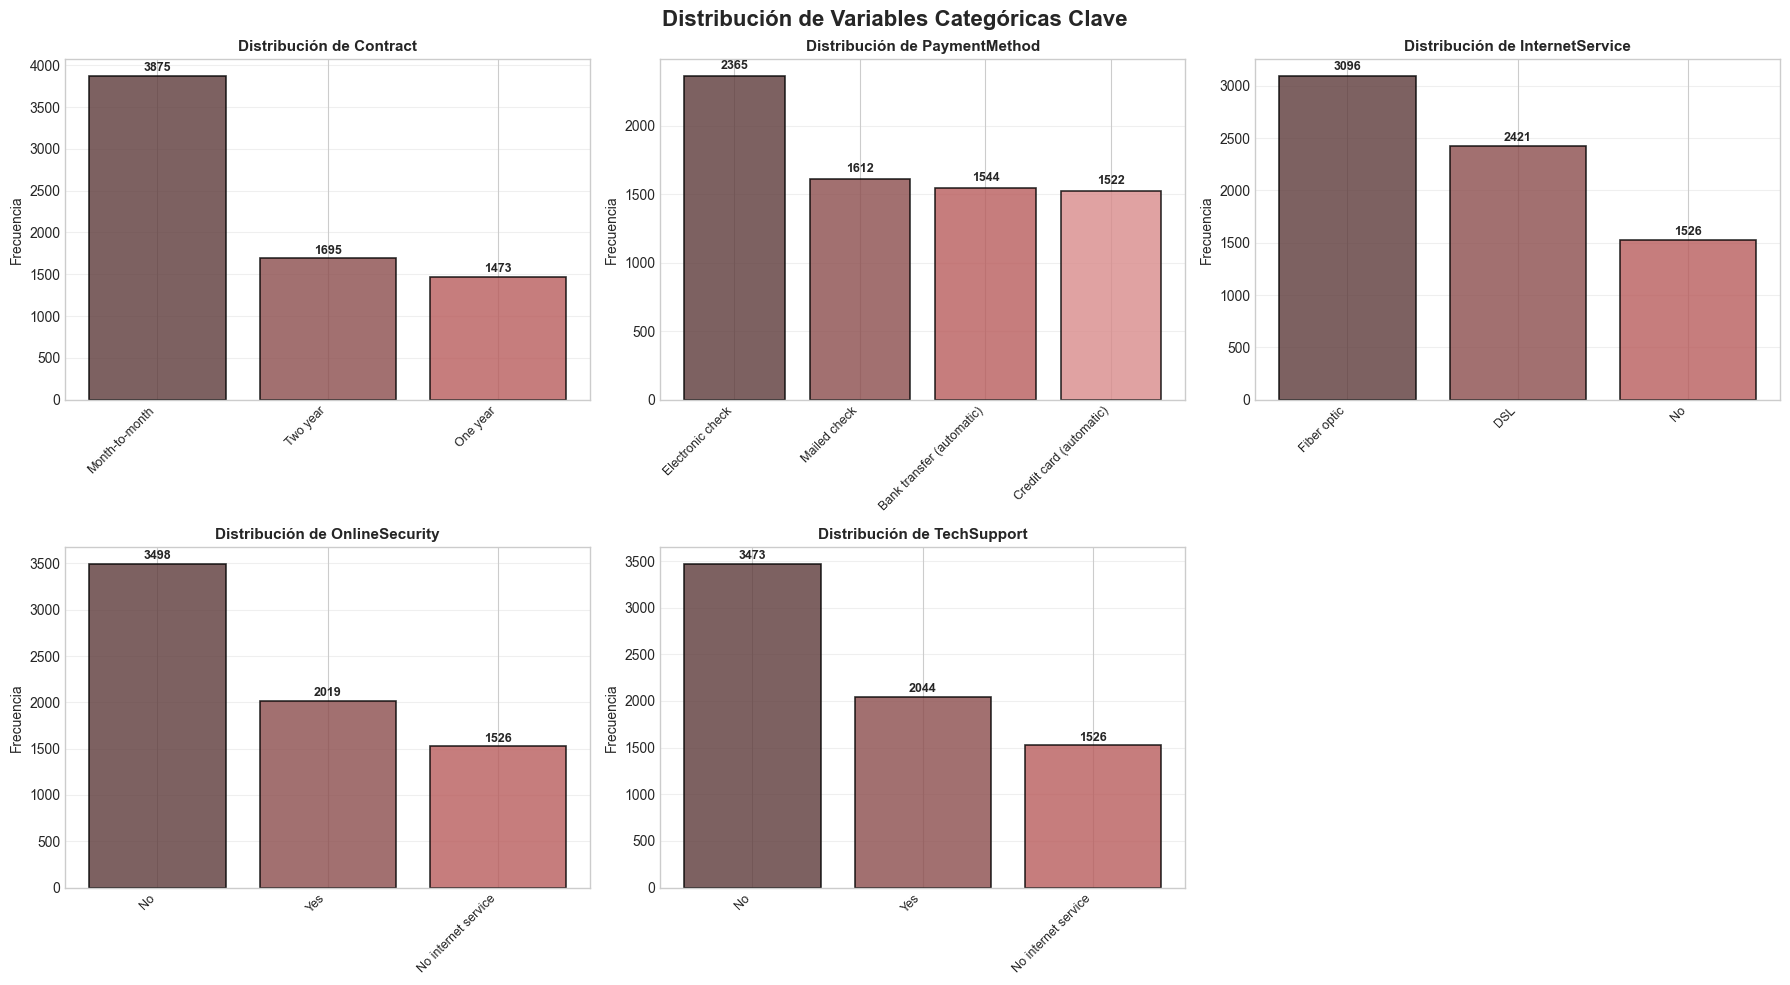

In [25]:
# Análisis de variables categóricas clave
categorical_features_key = ['Contract', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'TechSupport']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()
fig.suptitle('Distribución de Variables Categóricas Clave', fontsize=16, fontweight='bold')

for idx, col in enumerate(categorical_features_key):
    value_counts = df[col].value_counts()
    
    # Usar paleta consistente
    colors = COLOR_PALETTE['palette_main'][:len(value_counts)]
    
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                  color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
    axes[idx].set_title(f'Distribución de {col}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Frecuencia', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Añadir valores en las barras
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + 50, str(v), ha='center', fontsize=9, fontweight='bold')

# Eliminar el subplot extra
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()


## 1.9 Relación de Variables Categóricas con Churn

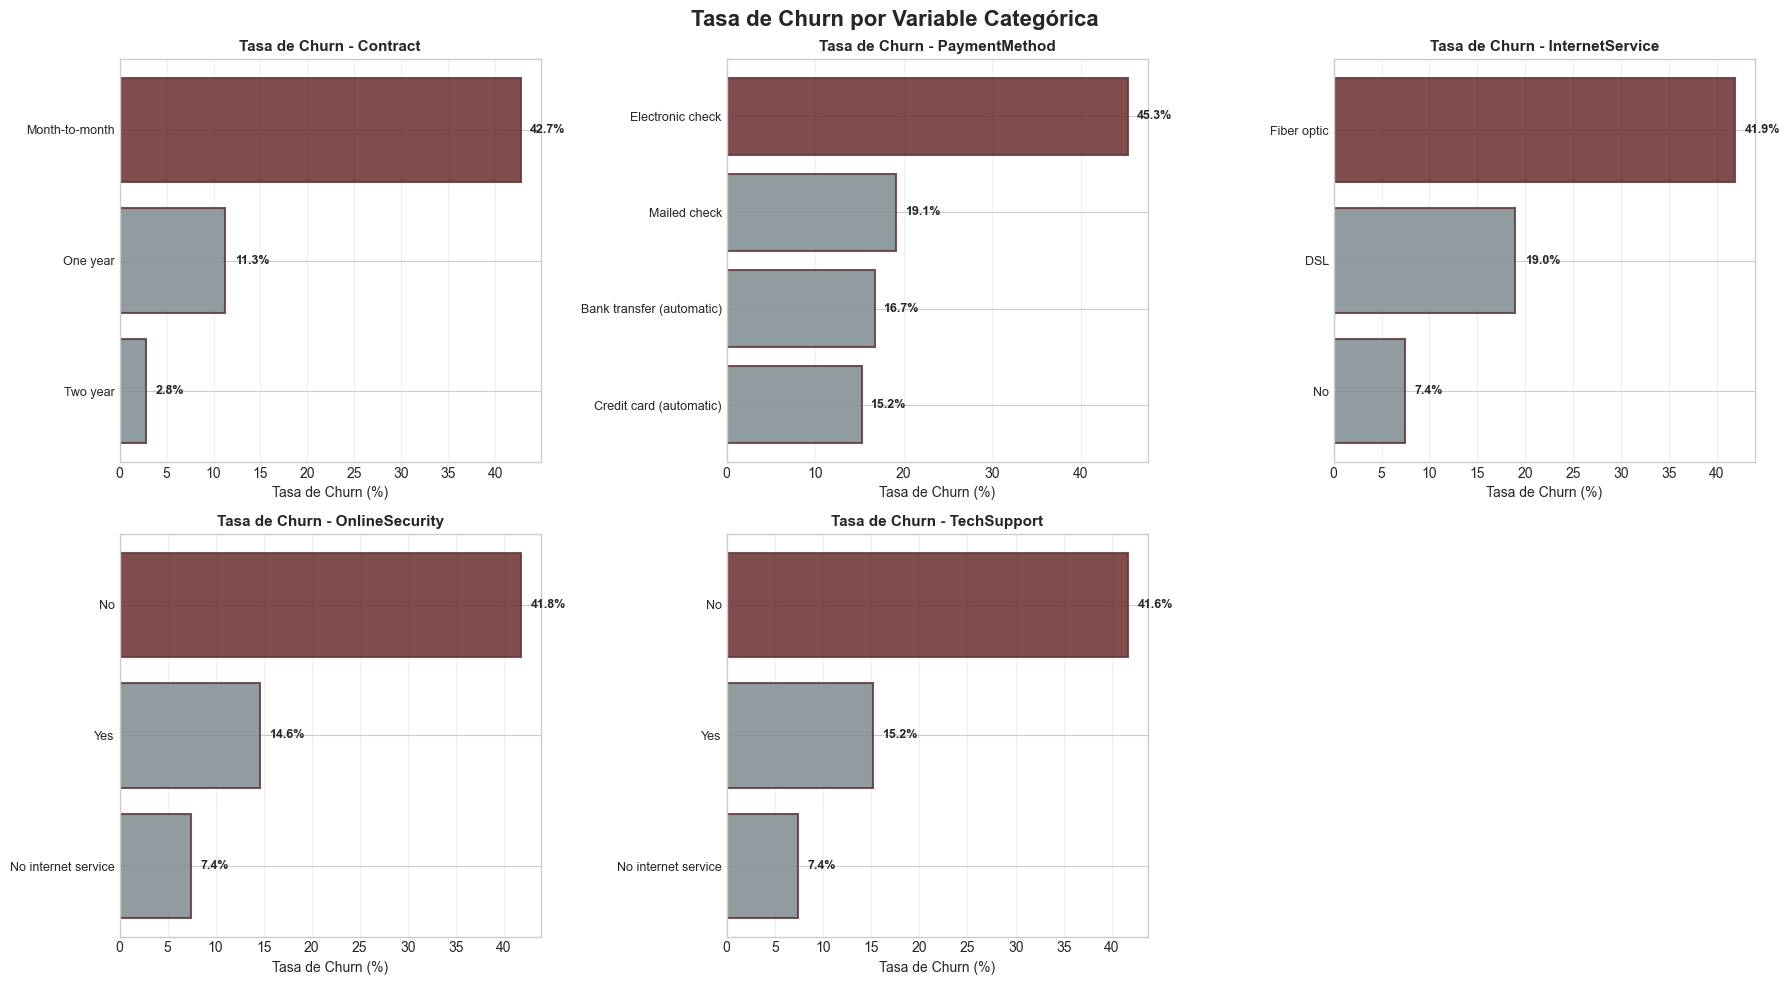


TASA DE CHURN POR VARIABLE CATEGÓRICA

Contract:
  Month-to-month: 42.71%
  One year: 11.27%
  Two year: 2.83%

PaymentMethod:
  Electronic check: 45.29%
  Mailed check: 19.11%
  Bank transfer (automatic): 16.71%
  Credit card (automatic): 15.24%

InternetService:
  Fiber optic: 41.89%
  DSL: 18.96%
  No: 7.40%

OnlineSecurity:
  No: 41.77%
  Yes: 14.61%
  No internet service: 7.40%

TechSupport:
  No: 41.64%
  Yes: 15.17%
  No internet service: 7.40%


In [27]:
# Tasa de churn por categoría
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()
fig.suptitle('Tasa de Churn por Variable Categórica', fontsize=16, fontweight='bold')

for idx, col in enumerate(categorical_features_key):
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).sort_values(ascending=False)
    
    # Gradiente de colores de la paleta vinotinto según nivel de riesgo
    colors_bar = []
    for rate in churn_rate.values:
        if rate > 40:
            colors_bar.append(COLOR_PALETTE['danger'])      
        elif rate > 30:
            colors_bar.append(COLOR_PALETTE['warning'])  
        elif rate > 20:
            colors_bar.append(COLOR_PALETTE['secondary']) 
        else:
            colors_bar.append(COLOR_PALETTE['success']) 
    
    axes[idx].barh(range(len(churn_rate)), churn_rate.values, color=colors_bar, 
                   alpha=0.85, edgecolor=COLOR_PALETTE['primary'], linewidth=1.5)
    axes[idx].set_yticks(range(len(churn_rate)))
    axes[idx].set_yticklabels(churn_rate.index, fontsize=9)
    axes[idx].set_title(f'Tasa de Churn - {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Tasa de Churn (%)', fontsize=10)
    axes[idx].grid(axis='x', alpha=0.3)
    axes[idx].invert_yaxis()
    
    # Añadir valores en las barras
    for i, v in enumerate(churn_rate.values):
        axes[idx].text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9, fontweight='bold')

# Eliminar el subplot extra
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Análisis detallado
print("\nTASA DE CHURN POR VARIABLE CATEGÓRICA")
for col in categorical_features_key:
    print(f"\n{col}:")
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).sort_values(ascending=False)
    for category, rate in churn_rate.items():
        print(f"  {category}: {rate:.2f}%")


### **Análisis e Interpretación: Variables Categóricas vs Churn**

**Hallazgos Clave:**

1. **Contract (Tipo de contrato):**
   - Contratos mes-a-mes tienen **tasa de churn muy alta** (~42%).
   - Contratos anuales o bianuales tienen **tasa de churn baja** (~11%).
   - **Conclusión**: El tipo de contrato es uno de los **predictores más importantes**.

2. **PaymentMethod (Método de pago):**
   - Pago con cheque electrónico tiene la **mayor tasa de churn** (~45%).
   - Pagos automáticos tienen menor churn.
   - **Conclusión**: Facilitar pagos automáticos puede reducir el churn.

3. **InternetService (Servicio de Internet):**
   - Clientes con Fibra Óptica tienen mayor churn que DSL.
   - **Posible causa**: Problemas de servicio o expectativas no cumplidas con fibra.

4. **OnlineSecurity y TechSupport:**
   - Clientes sin estos servicios tienen **mayor tasa de churn**.
   - **Conclusión**: Servicios adicionales de valor agregan fidelización.

## 1.10 Matriz de Correlación

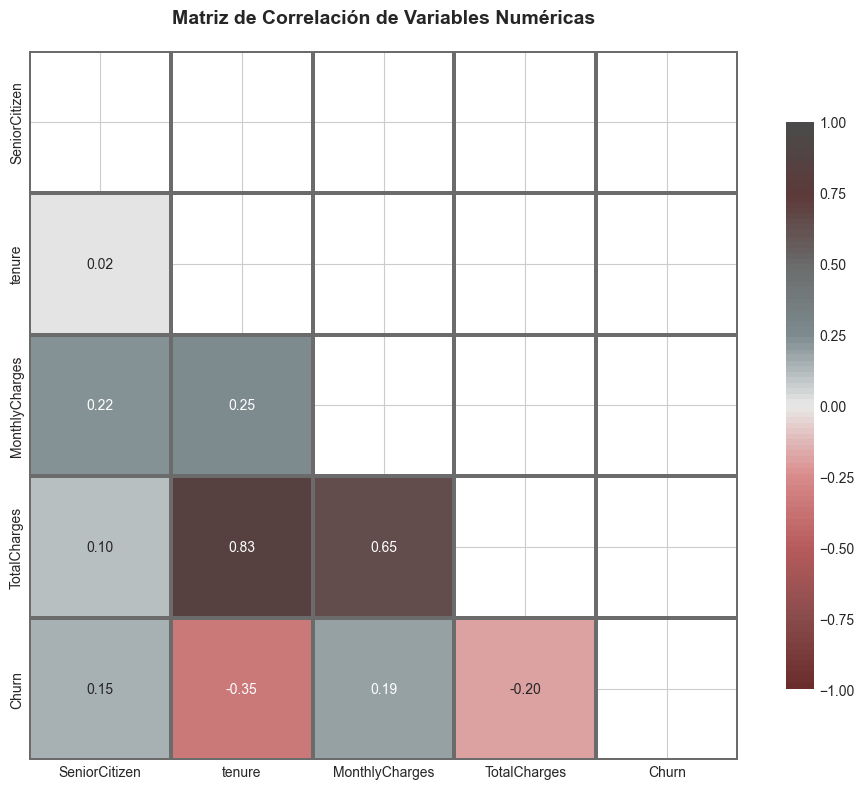


CORRELACIÓN CON LA VARIABLE OBJETIVO (CHURN)
Churn             1.00
MonthlyCharges    0.19
SeniorCitizen     0.15
TotalCharges     -0.20
tenure           -0.35
Name: Churn, dtype: float64


In [28]:
# Crear una copia para la correlación con variables codificadas
df_corr = df.copy()

# Codificar variable objetivo
df_corr['Churn'] = df_corr['Churn'].map({'No': 0, 'Yes': 1})

# Codificar SeniorCitizen si no es numérico
if df_corr['SeniorCitizen'].dtype == 'object':
    df_corr['SeniorCitizen'] = df_corr['SeniorCitizen'].map({'No': 0, 'Yes': 1})

# Convertir TotalCharges a numérico
df_corr['TotalCharges'] = pd.to_numeric(df_corr['TotalCharges'], errors='coerce')

# Seleccionar solo columnas numéricas
numeric_data = df_corr.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear máscara para mostrar solo la mitad inferior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Visualización con paleta personalizada vinotinto-gris
from matplotlib.colors import LinearSegmentedColormap
colors_cmap = ['#6B2C2C', '#8B4C4C', '#B85C5C', '#D98B8B', '#E8E8E8', '#7D8B8F', '#6B6B6B', '#5D3A3A', '#4A4A4A']
n_bins = 100
cmap_custom = LinearSegmentedColormap.from_list('vinotinto_gris', colors_cmap, N=n_bins)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap=cmap_custom, center=0, square=True, linewidths=1.5, 
            cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1,
            linecolor=COLOR_PALETTE['quinary'])
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlación con Churn
print("\nCORRELACIÓN CON LA VARIABLE OBJETIVO (CHURN)")
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)


## 1.10.1 Análisis de Componentes Principales (PCA)

In [30]:
# Análisis de Componentes Principales (PCA)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)")

# Preparar datos para PCA - solo variables numéricas sin valores nulos
df_pca = numeric_data.dropna()

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada por cada componente
variance_explained = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_explained)

print(f"\nNúmero de componentes: {len(variance_explained)}")
print(f"\nVarianza explicada por cada componente:")
for i, var in enumerate(variance_explained):
    print(f"  PC{i+1}: {var*100:.2f}% (Acumulada: {cumulative_variance[i]*100:.2f}%)")

# Componentes necesarios para capturar el 80% y 90% de la varianza
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Componentes necesarios para 80% de varianza: {n_components_80}")
print(f"Componentes necesarios para 90% de varianza: {n_components_90}")


ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)

Número de componentes: 5

Varianza explicada por cada componente:
  PC1: 44.94% (Acumulada: 44.94%)
  PC2: 27.80% (Acumulada: 72.74%)
  PC3: 16.70% (Acumulada: 89.43%)
  PC4: 9.39% (Acumulada: 98.83%)
  PC5: 1.17% (Acumulada: 100.00%)
Componentes necesarios para 80% de varianza: 3
Componentes necesarios para 90% de varianza: 4


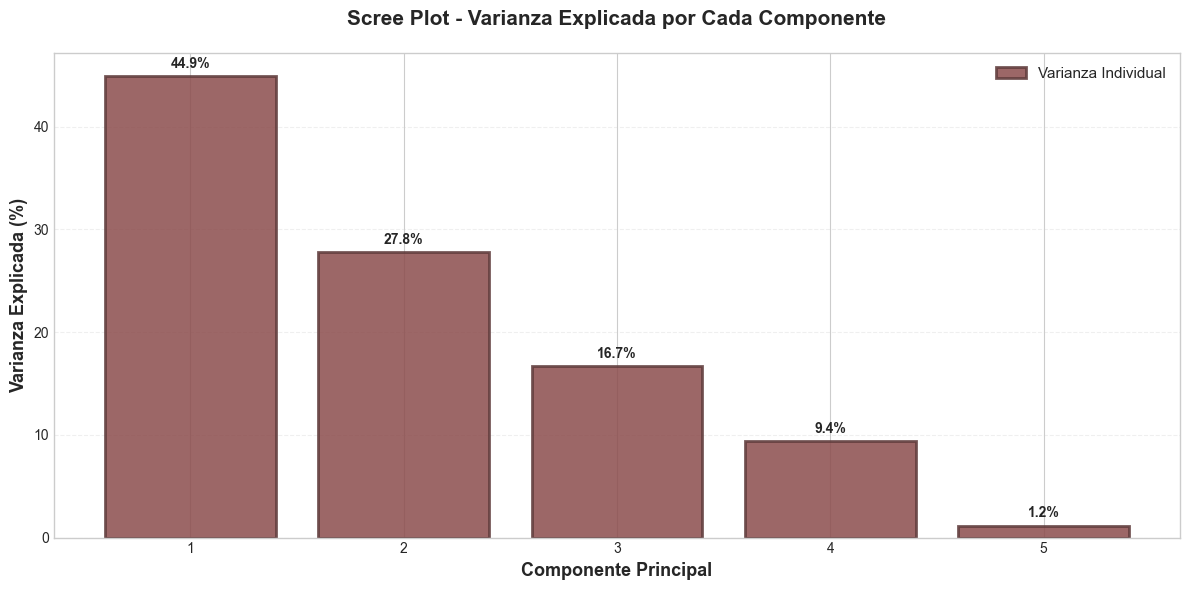

In [31]:
# Gráfico 1: Scree Plot - Varianza explicada por cada componente
fig, ax = plt.subplots(figsize=(12, 6))

# Barras para varianza individual
bars = ax.bar(range(1, len(variance_explained)+1), variance_explained*100, 
              color=COLOR_PALETTE['secondary'], alpha=0.85, 
              edgecolor=COLOR_PALETTE['primary'], linewidth=2,
              label='Varianza Individual')

# Añadir valores sobre las barras
for i, (bar, val) in enumerate(zip(bars, variance_explained*100)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{val:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Componente Principal', fontsize=13, fontweight='bold')
ax.set_ylabel('Varianza Explicada (%)', fontsize=13, fontweight='bold')
ax.set_title('Scree Plot - Varianza Explicada por Cada Componente', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(range(1, len(variance_explained)+1))
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.legend(loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()


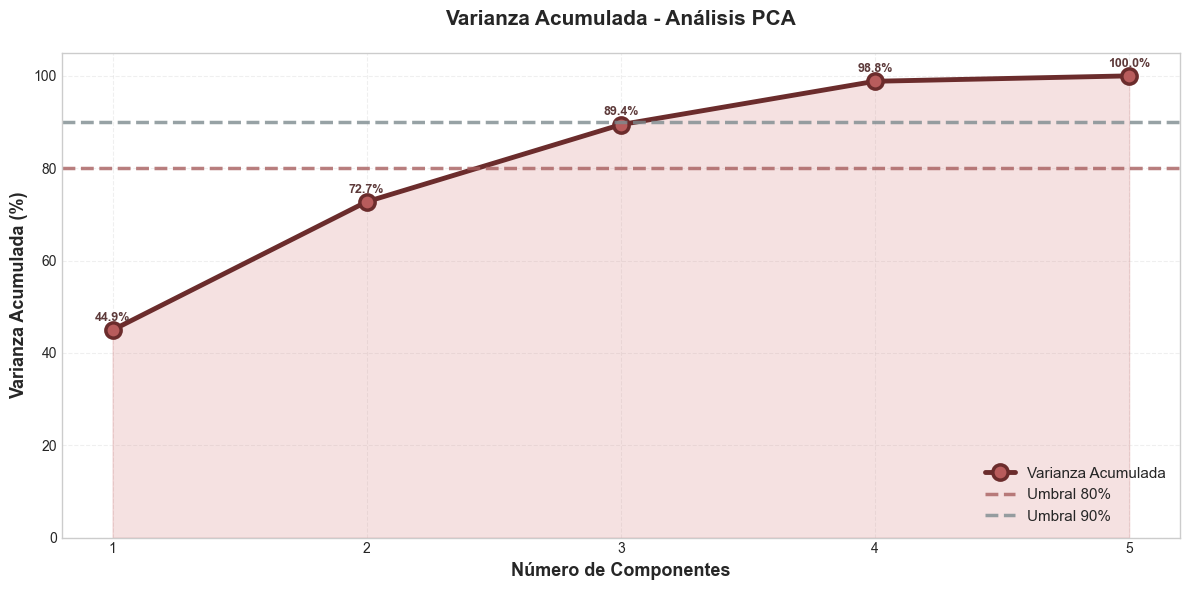

In [32]:
# Gráfico 2: Varianza Acumulada
fig, ax = plt.subplots(figsize=(12, 6))

# Línea de varianza acumulada
ax.plot(range(1, len(cumulative_variance)+1), cumulative_variance*100, 
        marker='o', color=COLOR_PALETTE['danger'], linewidth=3.5, markersize=11,
        markerfacecolor=COLOR_PALETTE['tertiary'], 
        markeredgecolor=COLOR_PALETTE['danger'],
        markeredgewidth=2.5, label='Varianza Acumulada')

# Líneas de referencia
ax.axhline(y=80, color=COLOR_PALETTE['warning'], linestyle='--', 
           linewidth=2.5, alpha=0.8, label='Umbral 80%')
ax.axhline(y=90, color=COLOR_PALETTE['success'], linestyle='--', 
           linewidth=2.5, alpha=0.8, label='Umbral 90%')

# Área bajo la curva
ax.fill_between(range(1, len(cumulative_variance)+1), cumulative_variance*100, 
                alpha=0.25, color=COLOR_PALETTE['quaternary'])

# Anotar puntos importantes
for i, val in enumerate(cumulative_variance*100):
    ax.text(i+1, val + 2, f'{val:.1f}%', ha='center', fontsize=9, 
            fontweight='bold', color=COLOR_PALETTE['primary'])

ax.set_xlabel('Número de Componentes', fontsize=13, fontweight='bold')
ax.set_ylabel('Varianza Acumulada (%)', fontsize=13, fontweight='bold')
ax.set_title('Varianza Acumulada - Análisis PCA', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(range(1, len(cumulative_variance)+1))
ax.set_ylim([0, 105])
ax.legend(loc='lower right', fontsize=11, framealpha=0.95)
ax.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


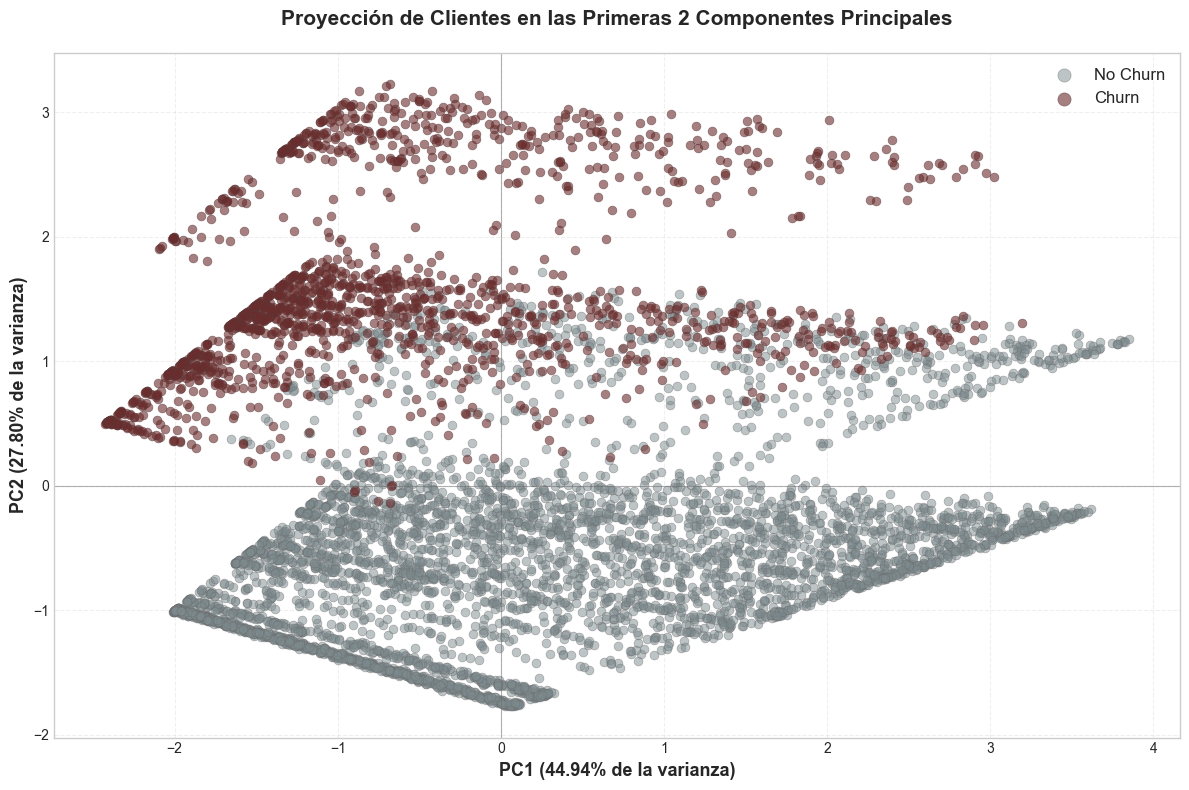

In [35]:
# Gráfico 3: Proyección en PC1 vs PC2 (Scatter Plot)
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(12, 8))

# Crear colormap personalizado para el scatter
cmap_scatter = ListedColormap([COLOR_PALETTE['churn_no'], COLOR_PALETTE['churn_yes']])

# Separar datos por clase para mejor visualización
churn_no = X_pca[df_pca['Churn'] == 0]
churn_yes = X_pca[df_pca['Churn'] == 1]

# Scatter plot con dos capas
scatter1 = ax.scatter(churn_no[:, 0], churn_no[:, 1], 
                     c=COLOR_PALETTE['churn_no'], 
                     alpha=0.5, s=40, 
                     edgecolor=COLOR_PALETTE['quinary'], linewidth=0.5,
                     label='No Churn')

scatter2 = ax.scatter(churn_yes[:, 0], churn_yes[:, 1], 
                     c=COLOR_PALETTE['churn_yes'], 
                     alpha=0.6, s=40, 
                     edgecolor=COLOR_PALETTE['primary'], linewidth=0.5,
                     label='Churn')

ax.set_xlabel(f'PC1 ({variance_explained[0]*100:.2f}% de la varianza)', 
              fontsize=13, fontweight='bold')
ax.set_ylabel(f'PC2 ({variance_explained[1]*100:.2f}% de la varianza)', 
              fontsize=13, fontweight='bold')
ax.set_title('Proyección de Clientes en las Primeras 2 Componentes Principales', 
             fontsize=15, fontweight='bold', pad=20)

# Añadir líneas de referencia en el origen
ax.axhline(y=0, color=COLOR_PALETTE['quinary'], linestyle='-', linewidth=0.8, alpha=0.5)
ax.axvline(x=0, color=COLOR_PALETTE['quinary'], linestyle='-', linewidth=0.8, alpha=0.5)

ax.legend(loc='best', fontsize=12, framealpha=0.95, 
          markerscale=1.5, shadow=True)
ax.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


## Interpretación del Scatter Plot:
- Puntos GRISES: Clientes que NO abandonaron (Retención)
- Puntos VINOTINTO: Clientes que SÍ abandonaron (Churn)
- Se observa cierta separación entre grupos en el espacio PC1-PC2
- Clientes con valores bajos en PC1 tienden a tener mayor probabilidad de churn")


In [36]:
# Loadings - Contribución de cada variable a los componentes principales
print("\nCONTRIBUCIÓN DE VARIABLES A LOS COMPONENTES PRINCIPALES")

# Crear DataFrame con los loadings
components_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=df_pca.columns
)

# Mostrar loadings para los primeros 3 componentes
print("\nLoadings (correlaciones) de las primeras 3 componentes principales:")
print(components_df[['PC1', 'PC2', 'PC3']].round(3))



CONTRIBUCIÓN DE VARIABLES A LOS COMPONENTES PRINCIPALES

Loadings (correlaciones) de las primeras 3 componentes principales:
                 PC1   PC2   PC3
SeniorCitizen   0.12  0.51  0.85
tenure          0.57 -0.27  0.06
MonthlyCharges  0.45  0.47 -0.31
TotalCharges    0.65  0.01 -0.11
Churn          -0.18  0.67 -0.41


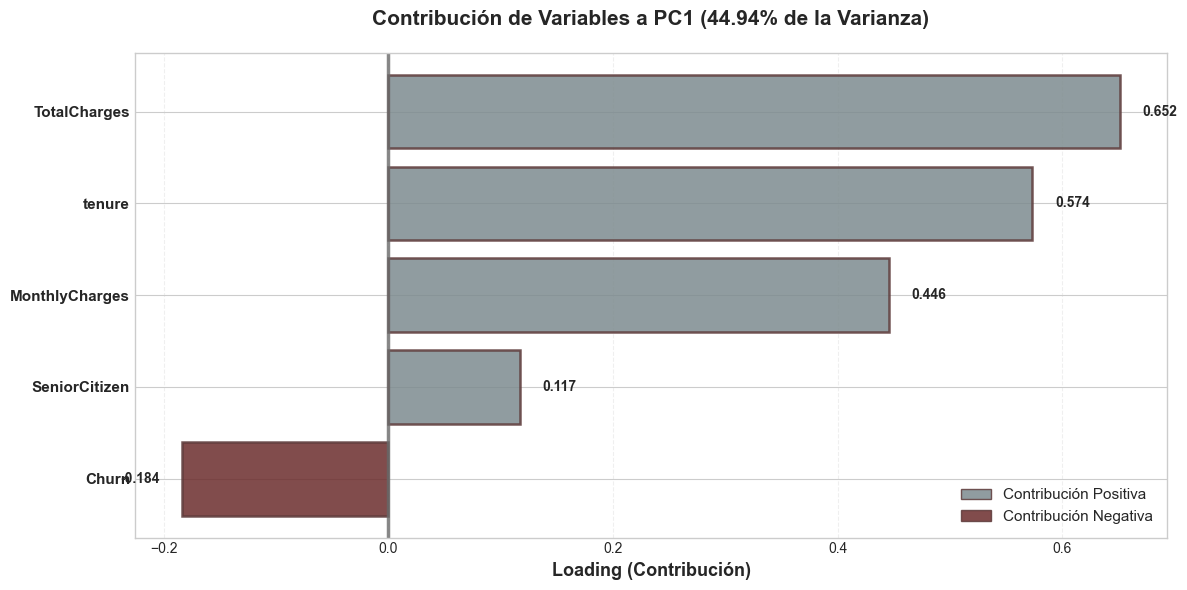

In [18]:
# Gráfico 4: Loadings de PC1
fig, ax = plt.subplots(figsize=(12, 6))

pc1_loadings = components_df['PC1'].sort_values()
colors_pc1 = [COLOR_PALETTE['danger'] if x < 0 else COLOR_PALETTE['success'] for x in pc1_loadings]

bars = ax.barh(range(len(pc1_loadings)), pc1_loadings.values, 
               color=colors_pc1, alpha=0.85, 
               edgecolor=COLOR_PALETTE['primary'], linewidth=1.8)

# Añadir valores en las barras
for i, (bar, val) in enumerate(zip(bars, pc1_loadings.values)):
    x_pos = val + (0.02 if val > 0 else -0.02)
    ha = 'left' if val > 0 else 'right'
    ax.text(x_pos, i, f'{val:.3f}', va='center', ha=ha, 
            fontsize=10, fontweight='bold')

ax.set_yticks(range(len(pc1_loadings)))
ax.set_yticklabels(pc1_loadings.index, fontsize=11, fontweight='bold')
ax.set_xlabel('Loading (Contribución)', fontsize=13, fontweight='bold')
ax.set_title(f'Contribución de Variables a PC1 ({variance_explained[0]*100:.2f}% de la Varianza)', 
             fontsize=15, fontweight='bold', pad=20)
ax.axvline(x=0, color=COLOR_PALETTE['quinary'], linewidth=2.5, alpha=0.8)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Añadir leyenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=COLOR_PALETTE['success'], edgecolor=COLOR_PALETTE['primary'], 
          label='Contribución Positiva', alpha=0.85),
    Patch(facecolor=COLOR_PALETTE['danger'], edgecolor=COLOR_PALETTE['primary'], 
          label='Contribución Negativa', alpha=0.85)
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=11)

plt.tight_layout()
plt.show()


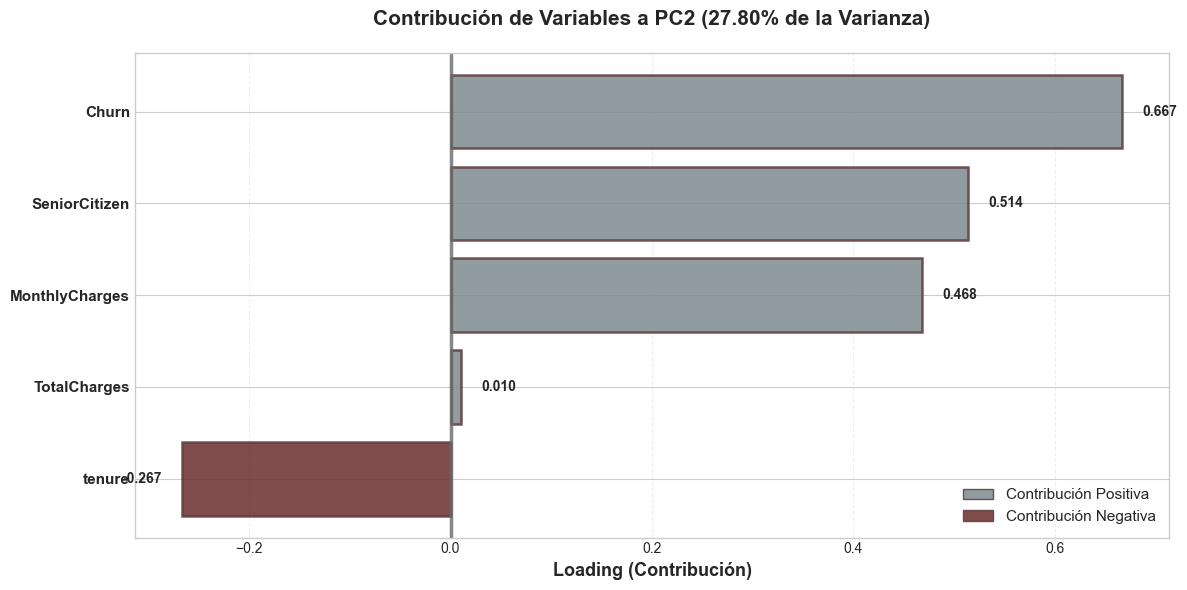

In [19]:
# Gráfico 5: Loadings de PC2
fig, ax = plt.subplots(figsize=(12, 6))

pc2_loadings = components_df['PC2'].sort_values()
colors_pc2 = [COLOR_PALETTE['danger'] if x < 0 else COLOR_PALETTE['success'] for x in pc2_loadings]

bars = ax.barh(range(len(pc2_loadings)), pc2_loadings.values, 
               color=colors_pc2, alpha=0.85, 
               edgecolor=COLOR_PALETTE['primary'], linewidth=1.8)

# Añadir valores en las barras
for i, (bar, val) in enumerate(zip(bars, pc2_loadings.values)):
    x_pos = val + (0.02 if val > 0 else -0.02)
    ha = 'left' if val > 0 else 'right'
    ax.text(x_pos, i, f'{val:.3f}', va='center', ha=ha, 
            fontsize=10, fontweight='bold')

ax.set_yticks(range(len(pc2_loadings)))
ax.set_yticklabels(pc2_loadings.index, fontsize=11, fontweight='bold')
ax.set_xlabel('Loading (Contribución)', fontsize=13, fontweight='bold')
ax.set_title(f'Contribución de Variables a PC2 ({variance_explained[1]*100:.2f}% de la Varianza)', 
             fontsize=15, fontweight='bold', pad=20)
ax.axvline(x=0, color=COLOR_PALETTE['quinary'], linewidth=2.5, alpha=0.8)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Añadir leyenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=COLOR_PALETTE['success'], edgecolor=COLOR_PALETTE['primary'], 
          label='Contribución Positiva', alpha=0.85),
    Patch(facecolor=COLOR_PALETTE['danger'], edgecolor=COLOR_PALETTE['primary'], 
          label='Contribución Negativa', alpha=0.85)
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=11)

plt.tight_layout()
plt.show()


### **Análisis e Interpretación: PCA**

**Hallazgos Clave:**

1. **Reducción de Dimensionalidad:**
   - Las primeras 2-3 componentes capturan la mayor parte de la varianza en los datos.
   - Esto indica que existe cierta redundancia en las variables originales.

2. **Interpretación de Componentes Principales:**
   - **PC1**: Captura principalmente la variación relacionada con `tenure` y `TotalCharges` (variables temporales y acumulativas).
   - **PC2**: Refleja la variación en `MonthlyCharges` (costo del servicio).

3. **Separabilidad de Churn:**
   - En el gráfico de proyección PC1 vs PC2, se observa cierta separación entre clientes con y sin churn.
   - Los clientes con churn tienden a agruparse en regiones con valores bajos de PC1 (menor tenure y TotalCharges).

**Recomendación:**
- Mantener las variables originales para el modelado principal (mejor interpretabilidad).
- Considerar PCA como experimento alternativo si se busca optimizar el rendimiento.

## 1.11 Tratamiento de Datos Faltantes y Limpieza

In [37]:
# Crear una copia del dataset para limpieza
df_clean = df.copy()

print("LIMPIEZA Y TRATAMIENTO DE DATOS")

# 1. Convertir TotalCharges a numérico
print("\n1. Conversión de TotalCharges a numérico...")
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
missing_total_charges = df_clean['TotalCharges'].isnull().sum()
print(f"   - Valores faltantes encontrados: {missing_total_charges}")

# 2. Analizar registros con TotalCharges faltante
if missing_total_charges > 0:
    print("\n2. Análisis de registros con TotalCharges faltante:")
    missing_records = df_clean[df_clean['TotalCharges'].isnull()]
    print(f"   - Tenure promedio: {missing_records['tenure'].mean():.2f} meses")
    print(f"   - MonthlyCharges promedio: ${missing_records['MonthlyCharges'].mean():.2f}")
    
    # Imputar TotalCharges = MonthlyCharges * tenure para registros faltantes
    print("\n3. Imputación de TotalCharges...")
    df_clean.loc[df_clean['TotalCharges'].isnull(), 'TotalCharges'] = \
        df_clean.loc[df_clean['TotalCharges'].isnull(), 'MonthlyCharges'] * \
        df_clean.loc[df_clean['TotalCharges'].isnull(), 'tenure']
    print(f"   Imputación completada")

# 3. Eliminar customerID (no es útil para el modelo)
print("\n4. Eliminación de columna customerID...")
if 'customerID' in df_clean.columns:
    df_clean = df_clean.drop('customerID', axis=1)
    print("   Columna customerID eliminada")

# 4. Verificación final
print("\n5. Verificación final:")
print(f"   - Dimensiones del dataset limpio: {df_clean.shape}")
print(f"   - Valores faltantes totales: {df_clean.isnull().sum().sum()}")

print("✓ LIMPIEZA COMPLETADA EXITOSAMENTE")

LIMPIEZA Y TRATAMIENTO DE DATOS

1. Conversión de TotalCharges a numérico...
   - Valores faltantes encontrados: 11

2. Análisis de registros con TotalCharges faltante:
   - Tenure promedio: 0.00 meses
   - MonthlyCharges promedio: $41.42

3. Imputación de TotalCharges...
   Imputación completada

4. Eliminación de columna customerID...
   Columna customerID eliminada

5. Verificación final:
   - Dimensiones del dataset limpio: (7043, 20)
   - Valores faltantes totales: 0
✓ LIMPIEZA COMPLETADA EXITOSAMENTE


## 1.12 Guardar Dataset Limpio

In [38]:
# Guardar el dataset limpio
output_path = '../data/telco_churn_clean.csv'
df_clean.to_csv(output_path, index=False)

print(f"Dataset limpio guardado en: {output_path}")
print(f"  Dimensiones: {df_clean.shape}")
print(f"  Columnas: {list(df_clean.columns)}")

Dataset limpio guardado en: ../data/telco_churn_clean.csv
  Dimensiones: (7043, 20)
  Columnas: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


## 1.13 Resumen del Análisis Exploratorio

### **Conclusiones Principales**

#### **1. Calidad de los Datos:**
- Dataset con 7,043 registros y 21 columnas.
- Valores faltantes mínimos en TotalCharges (11 registros), imputados exitosamente.
- No hay duplicados ni inconsistencias graves.

#### **2. Variable Objetivo (Churn):**
- Tasa de churn: ~27% (1,869 clientes).
- Desbalanceo moderado (ratio 3:1), manejable con técnicas apropiadas.

#### **3. Factores Clave Asociados al Churn:**

**Factores con Mayor Impacto:**
-  **Tipo de Contrato**: Month-to-month tiene 42% de churn vs. 11% en contratos largos.
-  **Antigüedad (tenure)**: Clientes nuevos (<12 meses) tienen mayor riesgo.
-  **Método de Pago**: Cheque electrónico tiene 45% de churn.
-  **Servicios Adicionales**: Clientes sin OnlineSecurity/TechSupport tienen mayor churn.

**Variables Numéricas Relevantes:**
- tenure: Correlación negativa fuerte con churn (-0.35).
- MonthlyCharges: Clientes con cargos altos tienen ligeramente mayor churn.

#### **4. Análisis de Componentes Principales (PCA):**
- Las primeras 2-3 componentes capturan la mayor parte de la varianza.
- PC1 relacionado con variables temporales (tenure, TotalCharges).
- PC2 relacionado con costos mensuales (MonthlyCharges).
- Se observa separabilidad entre clientes con y sin churn en el espacio de componentes principales.
---

### **Próximos Pasos:**
1. **Notebook 2**: Entrenamiento de modelos (Random Forest, XGBoost, CatBoost, LightGBM).
2. **Notebook 3**: Interpretabilidad con LIME.
3. Implementación de API y despliegue con Docker.